<a href="https://colab.research.google.com/github/jalbrRegis/Solar_Power_Prediction_MSDS692/blob/main/SolarPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solar Power Predictor

Solar power has long been a source for clean energy for residential and commercial properties but weighing the high installation cost against long term gains can be speculative and cumbersome. For this project weather data and solar data will be used combined with locational data to predict solar power generation. One can use the application to select a prospective area for solar installation and then predict how much energy can be produced. Homeowners and businesses can use the application to determine their brake even point and can use the predictions to understand how much energy they can expect from solar. With many corporations having “Go Green” initiatives it can also assist in estimating the cost of going carbon neutral. In all, estimating solar output would be helpful for anyone looking to reduce their carbon footprint but also ensuring energy and cost needs will be met in the future. 

Python Code for downloading Solar data and Solar array data found here: https://developer.nrel.gov/docs/solar/nsrdb/python-examples/

##Set Up Environment
For this project I used miniconda to manage my environment. Since this project was done in google Colab I installed everything with Bash and pip commands. The main reason this was done is to install the solar simulator package, as it has certain dependencies that must be installed to work.

In [1]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-03-01 02:52:47--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-03-01 02:52:47--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 4.08M 14s
    50K .......... .......... .......... .......... ..........  0

In [2]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cryptography-3.3.1         |   py36h3c74f83_1         633 KB
    pysocks-1.7.1              |   py36h06a4308_0          30 KB
    python-3.6.13              |       hdb3f193_0        33.9 MB
    ld_impl_linux-64-2.33.1    |       h53a641e_7         645 KB
    certifi-2020.12.5          |   py36h06a4308_0         144 KB
    ruamel_yaml-0.15.87        |   py36h7b6447c_1         256 KB
    libgcc-ng-9.1.0            |       hdf63c60_0         8.1 MB
    chardet-4.0.0              |py36h06a4308_1003         213 KB
    wheel-0.36.2               |     pyhd3eb1b0_0          31 KB
    cffi-1.14.5                |   py36h261ae71_0         224 KB
    conda-package-handling-1.7.2|   py36h03888b9_0  

cryptography-3.3.1   |  633 KB | ########## | 100% 
pysocks-1.7.1        |   30 KB | ########## | 100% 
python-3.6.13        | 33.9 MB | ########## | 100% 
ld_impl_linux-64-2.3 |  645 KB | ########## | 100% 
certifi-2020.12.5    |  144 KB | ########## | 100% 
ruamel_yaml-0.15.87  |  256 KB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
chardet-4.0.0        |  213 KB | ########## | 100% 
wheel-0.36.2         |   31 KB | ########## | 100% 
cffi-1.14.5          |  224 KB | ########## | 100% 
conda-package-handli |  967 KB | ########## | 100% 
libffi-3.3           |   54 KB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
openssl-1.1.1j       |  3.8 MB | ########## | 100% 
pyopenssl-20.0.1     |   48 KB | ########## | 100% 
_libgcc_mutex-0.1    |    3 KB | ########## | 100% 
readline-8.1         |  464 KB | ########## | 100% 
urllib3-1.26.3       |   99 KB | ########## | 100% 
six-1.15.0           |   13 KB | ########## | 100% 
yaml-0.2.5  

In [3]:
!conda install --channel conda-forge featuretools --yes

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - featuretools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bokeh-1.4.0                |   py36h9f0ad1d_1        13.5 MB  conda-forge
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    cloudpickle-1.6.0          |             py_0          22 KB  conda-forge
    conda-4.9.2                |   py36h5fab9bb_0         3.0 MB  conda-forge
    contextvars-2.4            |             py_0          11 KB  conda-for

In [4]:
!conda config --env --append channels nrel 
!conda install nrel-pysam nrel-pysam-stubs --yes

Solving environment: / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - nrel-pysam
    - nrel-pysam-stubs


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.1.19  |       h06a4308_0         121 KB
    certifi-2020.12.5          |   py36h06a4308_0         140 KB
    conda-4.9.2                |   py36h06a4308_0         2.9 MB
    nrel-pysam-2.2.0           |           py36_0        22.5 MB  nrel
    nrel-pysam-stubs-2.2.0     |           py36_0          81 KB  nrel
    ------------------------------------------------------------
                                           Total:        25.7 MB

The following NEW packages will be INSTALLED:

  nrel-pysam         nrel/linux-64::nrel-pysam-2.2.0-py36_0
  nrel-pysam-stubs   nrel/linux-64::nrel-pysam-stubs-2.2.0-

In [5]:
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))

##Packages
Here are the packages used for this project. Most of these packages are standard for data science including pandas, numpy, keras, sklearn, and tensorflow. Other packages are added in for statistical operations.

In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from IPython.display import display
import tensorflow as tf
import sklearn
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, SeparableConv1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import SGD
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_absolute_error
#import additional module for SAM simulation:
import site
import PySAM.PySSC as pssc


# Download PySAM here: https://pypi.org/project/NREL-PySAM/
# Use site.addsitedir() to set the path to the SAM SDK API. Set path to the python directory.
site.addsitedir('/Applications/sam-sdk-2015-6-30-r3/languages/python/')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# set np and tf random seed for reproducibility
tf.random.set_seed(1234)

#Helper Functions
Many larger tasks have been consolidated to helper fuctions. These tasks include getting the data, running the solar simulator, and data preprocssing. Most of the machine learning is not in function form.

In [8]:
# This is the function that downloads the solar data. Data is pulled year by year so i created a loop to pull multiple years at once. WARNING: if more that 5 years is pulled it might timeout as each API has a limit on how much data they can pull at a time.
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
def getSolarData(lat_in, lon_in, interval, year_in_start, year_in_finish):
  current_year = year_in_start
  while current_year <= year_in_finish:
    lat, lon, year = lat_in, lon_in, current_year
    # You must request an NSRDB api key from the link above
    api_key = 'plGXTmsw68GNU5zUMPKWb4GM1MnXfGWnk6xQsOIN'
    # Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
    attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle'
    # Choose year of data
    year = str(current_year)
    print(year)
    # Set leap year to true or false. True will return leap day data if present, false will not.
    leap_year = 'false'
    # Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
    interval = str(interval)
    # Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
    # NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
    # local time zone.
    utc = 'false'
    # Your full name, use '+' instead of spaces.
    your_name = 'Joe+Albrechta'
    # Your reason for using the NSRDB.
    reason_for_use = 'University_Project'
    # Your affiliation
    your_affiliation = 'Regis_University'
    # Your email address
    your_email = 'jalbrechta@regis.edu'
    # Please join our mailing list so we can keep you up-to-date on new developments.
    mailing_list = 'true'
    # Declare url string
    # url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key)
    url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
    print('Setting ' + str(current_year) + ' Parameters' )
    # Return just the first 2 lines to get metadata:
    info = pd.read_csv(url, nrows=1)
    # Return all but first 2 lines of csv to get data:
    # df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key), skiprows=2)
    df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)
    # Set the time index in the pandas dataframe:
    df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
    if current_year == year_in_start:
      concat_df = df
    else:
      concat_df = pd.concat([concat_df, df], axis=0)
    print('Finished Processing ' + str(current_year) + ' Data')
    current_year += 1
    print('Done')
  return concat_df,info

In [67]:
# This is the function that downloads the solar data. Data is pulled year by year so i created a loop to pull multiple years at once. WARNING: if more that 5 years is pulled it might timeout as each API has a limit on how much data they can pull at a time.
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
def getSolarDataOY(lat_in, lon_in, interval, year_in):
  current_year = year_in
  lat, lon, year = lat_in, lon_in, current_year
  # You must request an NSRDB api key from the link above
  api_key = 'plGXTmsw68GNU5zUMPKWb4GM1MnXfGWnk6xQsOIN'
  # Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
  attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle'
  # Choose year of data
  year = str(current_year)
  print(year)
  # Set leap year to true or false. True will return leap day data if present, false will not.
  leap_year = 'false'
  # Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
  interval = str(interval)
  # Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
  # NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
  # local time zone.
  utc = 'false'
  # Your full name, use '+' instead of spaces.
  your_name = 'Joe+Albrechta'
  # Your reason for using the NSRDB.
  reason_for_use = 'University_Project'
  # Your affiliation
  your_affiliation = 'Regis_University'
  # Your email address
  your_email = 'jalbrechta@regis.edu'
  # Please join our mailing list so we can keep you up-to-date on new developments.
  mailing_list = 'true'
  # Declare url string
  # url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key)
  url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
  print('Setting ' + str(current_year) + ' Parameters' )
  # Return just the first 2 lines to get metadata:
  info = pd.read_csv(url, nrows=1)
  # Return all but first 2 lines of csv to get data:
  # df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key), skiprows=2)
  df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)
  # Set the time index in the pandas dataframe:
  df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
  return df,info

In [9]:
# This function calls the Solar Simulator. It will take in solar data and output what the solar power output would be
# Each value is commented on how you can change the solar panel inputs
def addSolarPower(df,lat,lon,timezone,elevation,system_capacity):
  ssc = pssc.PySSC()
  # Resource inputs for SAM model:
  # Must be byte strings
  wfd = ssc.data_create()
  ssc.data_set_number(wfd, b'lat', lat)
  ssc.data_set_number(wfd, b'lon', lon)
  ssc.data_set_number(wfd, b'tz', timezone)
  ssc.data_set_number(wfd, b'elev', elevation)
  ssc.data_set_array(wfd, b'year', df.index.year)
  ssc.data_set_array(wfd, b'month', df.index.month)
  ssc.data_set_array(wfd, b'day', df.index.day)
  ssc.data_set_array(wfd, b'hour', df.index.hour)
  ssc.data_set_array(wfd, b'minute', df.index.minute)
  ssc.data_set_array(wfd, b'dn', df['DNI'])
  ssc.data_set_array(wfd, b'df', df['DHI'])
  ssc.data_set_array(wfd, b'wspd', df['Wind Speed'])
  ssc.data_set_array(wfd, b'tdry', df['Temperature'])
  # Create SAM compliant object  
  dat = ssc.data_create()
  ssc.data_set_table(dat, b'solar_resource_data', wfd)
  ssc.data_free(wfd)
  # Specify the system Configuration
  # Set system capacity in MW
  # system_capacity = system_capacity
  ssc.data_set_number(dat, b'system_capacity', system_capacity)
  # Set DC/AC ratio (or power ratio). See https://sam.nrel.gov/sites/default/files/content/virtual_conf_july_2013/07-sam-virtual-conference-2013-woodcock.pdf
  ssc.data_set_number(dat, b'dc_ac_ratio', 1.1)
  # Set tilt of system in degrees
  ssc.data_set_number(dat, b'tilt', 25)
  # Set azimuth angle (in degrees) from north (0 degrees)
  ssc.data_set_number(dat, b'azimuth', 180)
  # Set the inverter efficency
  ssc.data_set_number(dat, b'inv_eff', 96)
  # Set the system losses, in percent
  ssc.data_set_number(dat, b'losses', 14.0757)
  # Specify fixed tilt system (0=Fixed, 1=Fixed Roof, 2=1 Axis Tracker, 3=Backtracted, 4=2 Axis Tracker)
  ssc.data_set_number(dat, b'array_type', 1)
  # Set ground coverage ratio
  ssc.data_set_number(dat, b'gcr', 0.4)
  # Set constant loss adjustment
  ssc.data_set_number(dat, b'adjust:constant', 0)
  # execute and put generation results back into dataframe
  mod = ssc.module_create(b'pvwattsv5')
  ssc.module_exec(mod, dat)
  df[b'generation'] = np.array(ssc.data_get_array(dat, b'gen'))
  # free the memory
  ssc.data_free(dat)
  ssc.module_free(mod)
  return df

In [10]:
# This function ifs for viewing monthly stats.
def monthStats(month,df):
  dfnew = df[df.Month == month]
  dfnew = dfnew[['GHI','DHI','DNI','Wind Speed','Temperature','Solar Zenith Angle',b'generation']]
  summary = dfnew.describe()
  summary = summary.transpose()
  return summary

In [11]:
#This function is for plotting a daily view of solar production.
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
def nsrdb_plot(df, i):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax2 = ax.twinx()
    df['90 Degree Zenith'] = 90
    df[['GHI', 'DNI', 'DHI', 'Solar Zenith Angle', '90 Degree Zenith']][i:i+int(interval)].plot(ax=ax, figsize=(15,8), yticks=(np.arange(0,900,100)), style={'90 Degree Zenith': '--','Solar Zenith Angle': '-o', 'DNI': '-o', 'DHI': '-o', 'GHI': '-o'}, legend=False)
    df[b'generation'][i:i+30].plot(ax=ax2, yticks=(np.arange(0,4.5,0.5)), style={'generation': 'y-o'})
    ax.grid()
    ax.set_ylabel('W/m2')
    ax2.set_ylabel('kW')
    ax.legend(loc=2, ncol=5, frameon=False)
    ax2.legend(loc=1, frameon=False)

##Exploritory Data Analysis
In this section I will be downloading and exploring the Data. The helper functions will be utilized to pull and analyize key statistics for the Solar dataset.

In [54]:
#Set Latitude, Longitude, interval(60 minute intervals), and System Capacity
lat = 39.61
lon = -105.02
interval = 60
system_capacity = 6

In [148]:
# Download solar and Meta Data
df,info = getSolarData(lat,lon,interval,2013,2018)

2013
Setting 2013 Parameters
Finished Processing 2013 Data
Done
2014
Setting 2014 Parameters
Finished Processing 2014 Data
Done
2015
Setting 2015 Parameters
Finished Processing 2015 Data
Done
2016
Setting 2016 Parameters
Finished Processing 2016 Data
Done
2017
Setting 2017 Parameters
Finished Processing 2017 Data
Done
2018
Setting 2018 Parameters
Finished Processing 2018 Data
Done


In [149]:
#Display Meta Data
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,Clearsky DHI Units,Clearsky DNI Units,Clearsky GHI Units,Dew Point Units,DHI Units,DNI Units,GHI Units,Solar Zenith Angle Units,Temperature Units,Pressure Units,Relative Humidity Units,Precipitable Water Units,Wind Direction Units,Wind Speed,Cloud Type -15,Cloud Type 0,Cloud Type 1,Cloud Type 2,Cloud Type 3,Cloud Type 4,Cloud Type 5,Cloud Type 6,Cloud Type 7,Cloud Type 8,Cloud Type 9,Cloud Type 10,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,144379,-,-,-,39.61,-105.02,-7,1643,-7,w/m2,w/m2,w/m2,c,w/m2,w/m2,w/m2,Degree,c,mbar,%,cm,Degrees,m/s,NaN,Clear,Probably Clear,Fog,Water,Super-Cooled Water,Mixed,Opaque Ice,Cirrus,Overlapping,Overshooting,Unknown,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.1.0


In [150]:
#See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [151]:
#Add solar power by using the simulator to dataframe
df = addSolarPower(df,lat,lon,timezone,elevation, system_capacity)

In [152]:
#Print column names
print(df.columns.values)

['Year' 'Month' 'Day' 'Hour' 'Minute' 'GHI' 'DHI' 'DNI' 'Wind Speed'
 'Temperature' 'Solar Zenith Angle' b'generation']


In [153]:
#Look at data shape
print('shape:', df.shape)

shape: (52560, 12)


In [154]:
#Preview Data
df.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,b'generation'
2013-01-01 00:00:00,2013,1,1,0,30,0,0,0,1.0,-8.0,162.45,0.0
2013-01-01 01:00:00,2013,1,1,1,30,0,0,0,1.2,-9.0,155.28,0.0
2013-01-01 02:00:00,2013,1,1,2,30,0,0,0,1.4,-9.0,144.93,0.0
2013-01-01 03:00:00,2013,1,1,3,30,0,0,0,1.6,-10.0,133.60,0.0
2013-01-01 04:00:00,2013,1,1,4,30,0,0,0,1.8,-10.0,122.06,0.0


###Get to Know your Data

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2013-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                52560 non-null  int64  
 1   Month               52560 non-null  int64  
 2   Day                 52560 non-null  int64  
 3   Hour                52560 non-null  int64  
 4   Minute              52560 non-null  int64  
 5   GHI                 52560 non-null  int64  
 6   DHI                 52560 non-null  int64  
 7   DNI                 52560 non-null  int64  
 8   Wind Speed          52560 non-null  float64
 9   Temperature         52560 non-null  float64
 10  Solar Zenith Angle  52560 non-null  float64
 11  b'generation'       52560 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 5.2 MB


In [156]:
df[['GHI', 'DNI', 'DHI', 'Solar Zenith Angle',b'generation']].describe()

,GHI,DNI,DHI,Solar Zenith Angle,b'generation'
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,194.591324,243.334513,61.196804,89.691046,1.039104
std,281.244975,355.986198,97.513478,36.329272,1.503065
min,0.000000,0.000000,0.000000,17.210000,0.000000
25%,0.000000,0.000000,0.000000,61.010000,0.000000
50%,0.000000,0.000000,0.000000,89.685000,0.000000
75%,349.000000,485.000000,86.000000,118.372500,1.997177
max,1068.000000,1076.000000,509.000000,162.840000,5.454545


In [157]:
# Show Stats for one month of solar power generation
monthStats(1,df)

,count,mean,std,min,25%,50%,75%,max
GHI,4464.0,105.684140,171.769026,0.00,0.0000,0.0,175.000000,626.000000
DHI,4464.0,31.754032,52.261519,0.00,0.0000,0.0,53.000000,264.000000
DNI,4464.0,200.576165,340.734963,0.00,0.0000,0.0,316.500000,1052.000000
Wind Speed,4464.0,2.701680,1.615187,0.10,1.5000,2.3,3.600000,11.500000
Temperature,4464.0,0.294489,5.277651,-15.00,-2.0000,0.0,3.000000,19.000000
Solar Zenith Angle,4464.0,105.955271,33.843851,56.89,72.6925,101.8,134.830000,162.480000
b'generation',4464.0,0.838507,1.371003,0.00,0.0000,0.0,1.355742,4.924517


###Generate daily power generation plot

In [158]:
# Divide sum of generation by the number of periods times the system size
df[b'generation'].sum() / (525600/int(interval) * system_capacity)

1.039103578197736

In [159]:
# Total Energy:
df[b'generation'].sum()

54615.284070073

Line Plot: This next plot shows a typical day of solar power generation. The solid red line is the solar power produced per hour in kW.

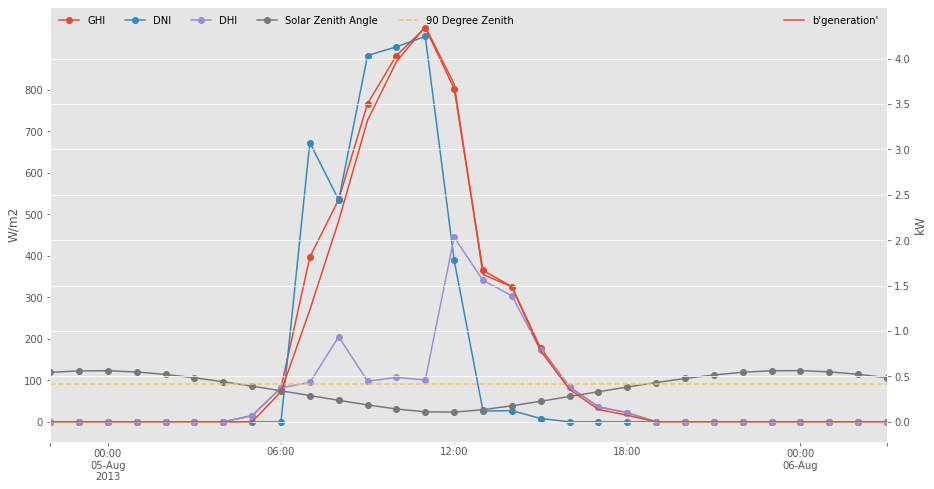

In [160]:
#Plot Solar Energy Graph
nsrdb_plot(df, 5182)

###Correlation Matrix
The following is a correlation matrix for the simulation input. As we can see from the graph that GHI has a high coorelation to the solar power generation. If we were going to predict solar power from GHI, DHI, DNI, Windspeed, Temp, and solar zenith angle.

In [161]:
dfcor = df[['GHI','DHI','DNI','Wind Speed','Temperature','Solar Zenith Angle',b'generation']]
corr = dfcor.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,b'generation'
GHI,1.000000,0.653931,0.852837,0.254543,0.557081,-0.801437,0.959726
DHI,0.653931,1.000000,0.315530,0.215270,0.452261,-0.720708,0.604699
DNI,0.852837,0.315530,1.000000,0.235438,0.410710,-0.654999,0.882055
Wind Speed,0.254543,0.215270,0.235438,1.000000,0.016586,-0.244528,0.284496
Temperature,0.557081,0.452261,0.410710,0.016586,1.000000,-0.612392,0.448806
Solar Zenith Angle,-0.801437,-0.720708,-0.654999,-0.244528,-0.612392,1.000000,-0.765723
b'generation',0.959726,0.604699,0.882055,0.284496,0.448806,-0.765723,1.000000


### Corralation Analysis
Since for this project we are only interested in predicting the future power generated from these inputs the correlation isn't what is of interest to us. If we were building a solar power predictor for known data, these features would be of interest. Since we are not, we will old be working with the power generation value.

In [162]:
#For predicting solar power I think the best timeframe to predict is a week ahead. Lets take a look at all the values by week and see what the data shows us.
dfpg = df[['DNI', 'DHI', 'Wind Speed','Temperature']].groupby(pd.Grouper(freq='W')).mean() 
dfpgs = df[[b'generation']].groupby(pd.Grouper(freq='W')).sum()
SolarData = dfpg.join(dfpgs)
SolarData.head(15)

,DNI,DHI,Wind Speed,Temperature,b'generation'
2013-01-06,288.284722,22.451389,1.961111,-2.965278,152.603396
2013-01-13,153.369048,33.994048,2.742262,-1.416667,119.302795
2013-01-20,273.160714,26.886905,2.575000,-1.136905,169.584653
2013-01-27,198.714286,32.398810,2.422024,4.482143,136.190579
2013-02-03,212.119048,38.297619,3.291667,0.607143,154.753856
2013-02-10,181.982143,39.589286,2.500595,1.785714,134.536826
2013-02-17,214.750000,45.267857,3.117857,-0.690476,163.374740
2013-02-24,129.702381,56.619048,2.618452,-2.017857,132.216144
2013-03-03,235.684524,55.750000,2.942262,-0.488095,186.944963
2013-03-10,217.732143,48.541667,3.035714,2.166667,164.933144


In [163]:
SolarData[['DNI', 'DHI',b'generation']].describe()

,DNI,DHI,b'generation'
count,314.000000,314.000000,314.000000
mean,242.724892,61.076300,173.934026
std,64.045851,26.925525,33.283617
min,7.125000,19.607143,4.598528
25%,202.583333,36.620536,149.656640
50%,244.032738,56.818452,178.428008
75%,288.365823,86.665179,200.539063
max,437.071429,122.232143,237.728070


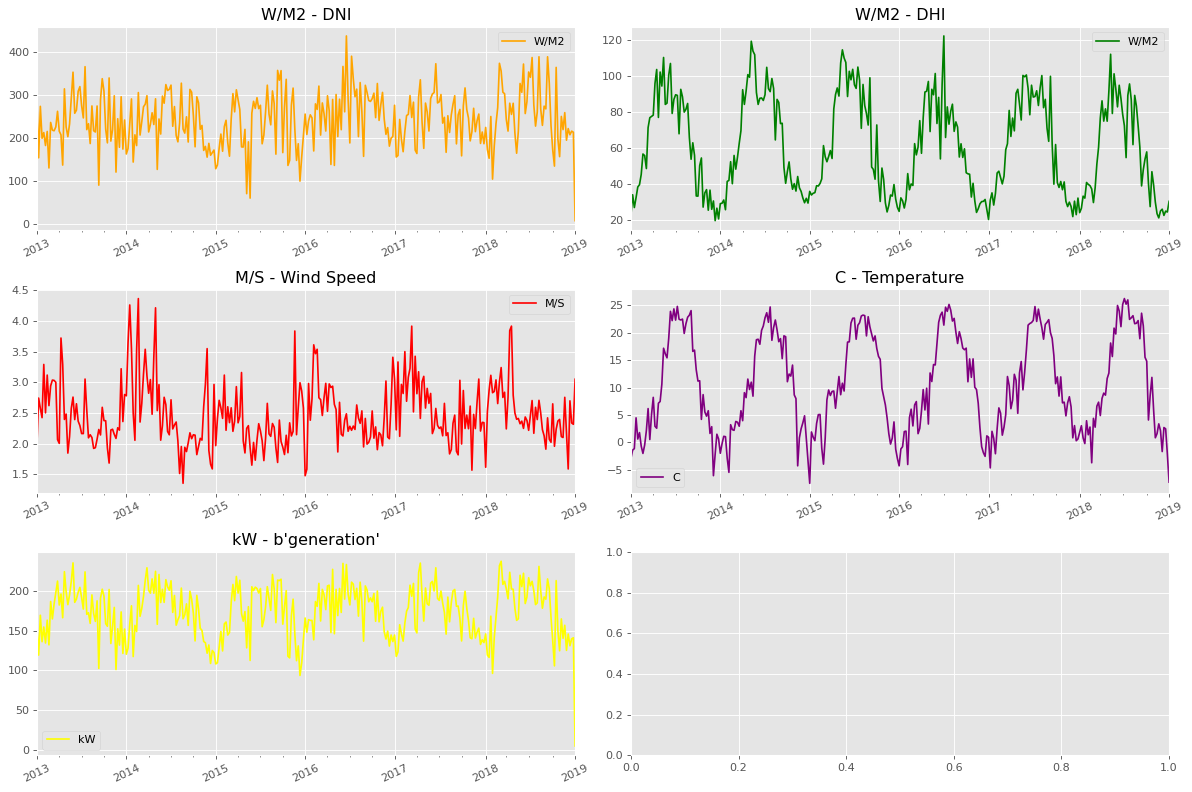

In [199]:
titles = [
    "W/M2",
    "W/M2",
    "M/S",
    "C",
    "kW"
]

feature_keys = [
    "DNI",
    "DHI",
    "Wind Speed",
    "Temperature",
    b'generation'
]

colors = [
    "orange",
    "green",
    "red",
    "purple",
    "yellow"
]

date_time_key = SolarData.index

def show_raw_visualization(data):
    fig, axes = plt.subplots(
        nrows=3, ncols=2, figsize=(15, 10), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()

show_raw_visualization(SolarData)

##EDA Analysis
For this data set we do not see an overall upward trend in the the data which is good for time series. This means the data is most likely stationary, but we should do a statisical test for that. Also, to simplify the problem, since these are all inputs to the solar simulator, I have chosen to make this a univariate time-series prediction problem. I will be using past solar power generation history to predict future.

In [201]:
#lets Now look at power data by D,W,M and Year. 
#I am pretty sure weekly would be the best here as daily might be too short of a prediction and monlthly is most likely non-stationary and not good for timeseries.
sp_raw = df[[b'generation']]
sp_raw.columns = ['kW']
sp_raw.head(15)

,kW
2013-01-01 00:00:00,0.000000
2013-01-01 01:00:00,0.000000
2013-01-01 02:00:00,0.000000
2013-01-01 03:00:00,0.000000
2013-01-01 04:00:00,0.000000
2013-01-01 05:00:00,0.000000
2013-01-01 06:00:00,0.000000
2013-01-01 07:00:00,0.000000
2013-01-01 08:00:00,0.802012
2013-01-01 09:00:00,1.347560


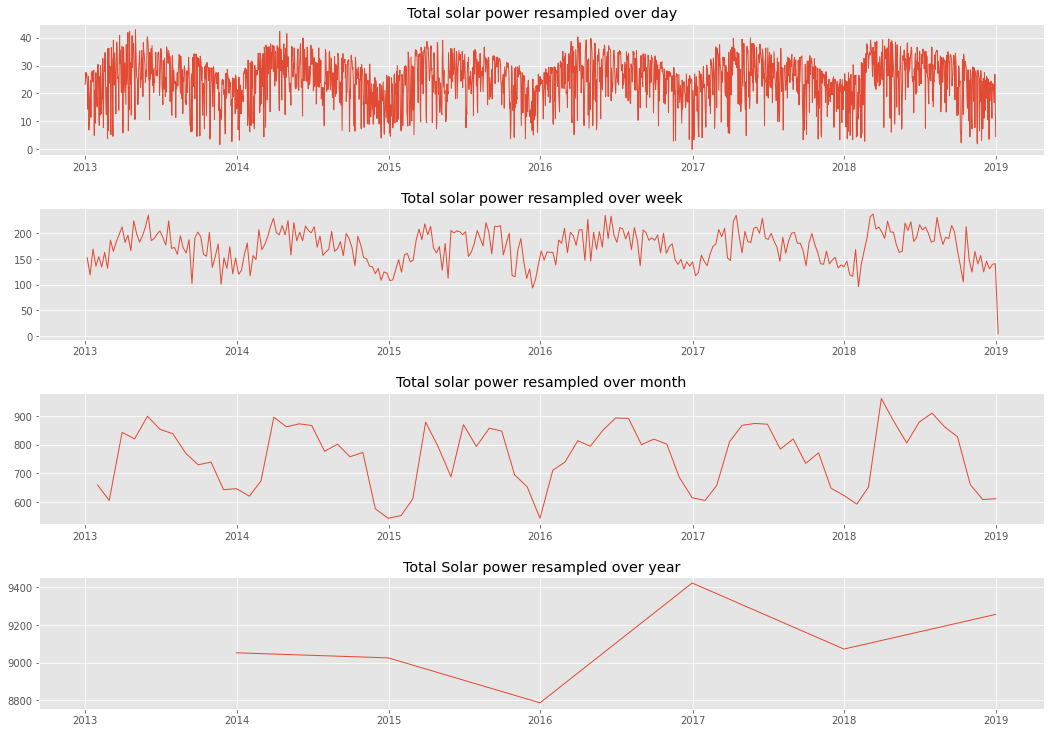

In [166]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(sp_raw.resample('D').sum(),linewidth=1)
ax1.set_title('Total solar power resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(sp_raw.resample('W').sum(),linewidth=1)
ax2.set_title('Total solar power resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(sp_raw.resample('M').sum(),linewidth=1)
ax3.set_title('Total solar power resampled over month')
ax3.tick_params(axis='both', which='major')

ax5  = fig.add_subplot(5,1,4, sharex=ax1)
ax5.plot(sp_raw.resample('A').sum(),linewidth=1)
ax5.set_title('Total Solar power resampled over year')
ax5.tick_params(axis='both', which='major');

## Test for Stationary Data

The Dickey-Fuller test is used for time series data to rule out an overall trend in the data. In other words, we want our data overall stationary for better predictions. This can be tricky with weather data especially if there is an effect of climate change over the timespan. This trend could be apperant in monthly data not not so much in weekly or daily. You can see from the graph that there is clearly an upwards trend of solar power but its harder to detect in the weekly or daily graphs. I am confident the statistical test will pass for the weekly or daily dataset but fail for monthly and yearly.

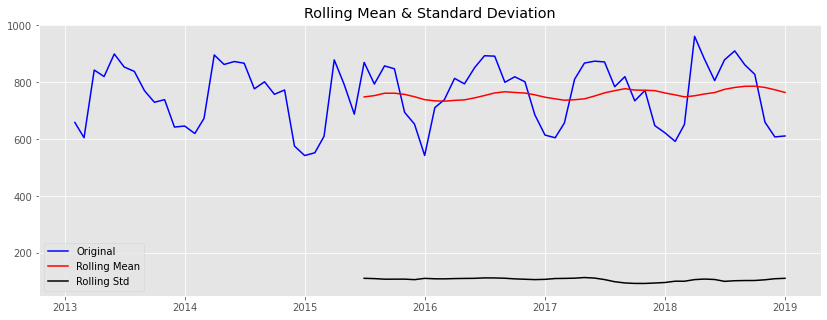

<Results of Dickey-Fuller Test>
Test Statistic                 -1.293011
p-value                         0.632364
#Lags Used                     11.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [167]:
stats_monthly=sp_raw.resample('M').sum()

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(stats_monthly.kW.dropna())

As we can see from the P-vaule >= .05 that the data is determined to be non stationary and not the best aggregation for time-series predictions. Lets look at the weekly data next.

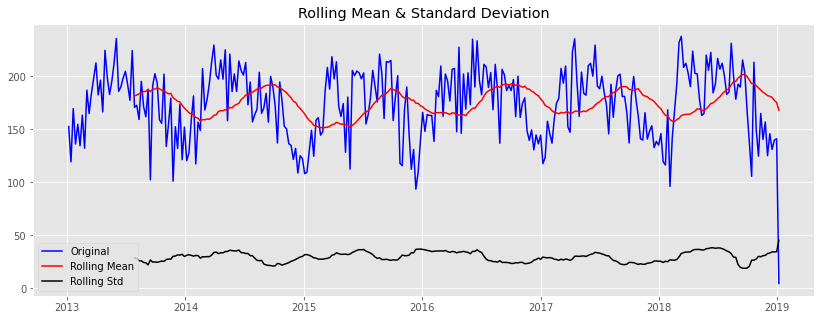

<Results of Dickey-Fuller Test>
Test Statistic                  -3.547801
p-value                          0.006841
#Lags Used                       3.000000
Number of Observations Used    310.000000
Critical Value (1%)             -3.451622
Critical Value (5%)             -2.870909
Critical Value (10%)            -2.571762
dtype: float64


In [168]:
stats_weekly=sp_raw.resample('W').sum()

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(stats_weekly.kW.dropna())

### Stationary Test Results
Since the p-value of the Dickey-Fuller Test is <= 0.05 we reject the null hypothesis (H0), the data does not have a unit root and is stationary. This means predicting solar power a week aheads will give the best accuracy for our time-series predictions. We will proceed to the machine learning from here.

# Time_series Power Prediction
For our Time-Series predictions I will be training an LSTM network. We will be performing a univariate prediction, that is, using past solar power to predict future solar power. Our prediction will be one week a head using a lookback of 12 weeks.

In [169]:
#Get rid of the 0 values for between sunset and sunrise.
columns = ['kW']
sp_raw_NA = sp_raw.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns).fillna(0).astype(int)
#sp_raw_NA = sp_raw

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [207]:
# An LSTM takes in a 3 dimentional numpy array. This code scales the data, creates the train and test set, and then reshapes it to the proper input.
spw = sp_raw_NA.groupby(pd.Grouper(freq='W')).sum()
dataset = spw.kW.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 12
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(238, 1, 12)
(238,)
(50, 1, 12)
(50,)


In [208]:
model = Sequential()
model.add(LSTM(256,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.05))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.05))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.05))
model.add(LSTM(32))
model.add(Dropout(0.05))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=4, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/100
60/60 [==============================] - 9s 35ms/step - loss: 0.3270 - val_loss: 0.0263
Epoch 2/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0198 - val_loss: 0.0248
Epoch 3/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0219 - val_loss: 0.0243
Epoch 4/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0211 - val_loss: 0.0241
Epoch 5/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0213 - val_loss: 0.0234
Epoch 6/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0190 - val_loss: 0.0231
Epoch 7/100
60/60 [==============================] - 1s 13ms/step - loss: 0.0206 - val_loss: 0.0229
Epoch 8/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0202 - val_loss: 0.0222
Epoch 9/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0209 - val_loss: 0.0215
Epoch 10/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0186 - val_loss: 0.0210

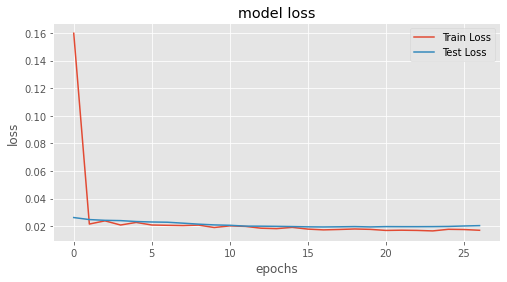

In [209]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [210]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 19.334935965282558
Train Root Mean Squared Error: 23.94593579568365
Test Mean Absolute Error: 22.40011946011334
Test Root Mean Squared Error: 28.176465076227466


##Results:
### MAE and RMSE
I computed both the MAE and RMSE, what is curious is the test data performed better than the training data. This can point back to the dataset being time ordered and the later weeks being used to test could have less flucuation than the training set. Also, the training set is a bigger dataset so more outliers could affect the models volitility. From a practical standpoint, being off by plus or minus 22-28 kW out of 174kW weekly average is not bad.

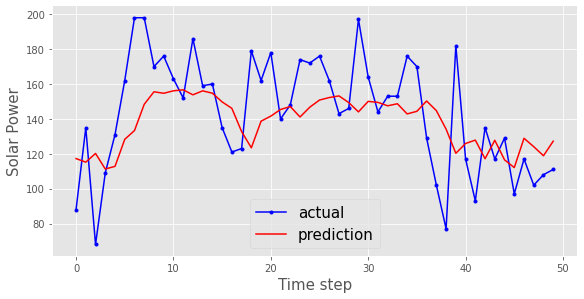

In [211]:
aa=[x for x in range(50)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:50], marker='.', label="actual", color = "Blue")
plt.plot(aa, test_predict[:,0][:50], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Solar Power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

##Results:
###Graphical
Here are the graphical prediction results. The predictions follow the general trend but have trouble with the spikes (low or high). It seems quick drastic changes in conditions give the model trouble. For a univarate prediction however it seems to do a nice job and will give the users an indiction of how much power they will generate in the next week.

##Prediction

In [212]:
# Get 2019 Solar Data
df_p,info_p = getSolarDataOY(lat,lon,interval,2019)

2019
Setting 2019 Parameters


In [213]:
df_p.tail()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle
2019-12-31 19:00:00,2019,12,31,19,30,0,0,0,3.5,-14.1,120.76
2019-12-31 20:00:00,2019,12,31,20,30,0,0,0,3.1,-14.5,132.29
2019-12-31 21:00:00,2019,12,31,21,30,0,0,0,2.8,-14.8,143.66
2019-12-31 22:00:00,2019,12,31,22,30,0,0,0,2.5,-15.0,154.20
2019-12-31 23:00:00,2019,12,31,23,30,0,0,0,2.1,-15.0,161.95


In [214]:
# Add Solar Power
df_p_sp = addSolarPower(df_p,lat,lon,timezone,elevation, system_capacity)

In [215]:
# Group by Week
df_p_sp_w = df_p_sp[[b'generation']].groupby(pd.Grouper(freq='W')).sum()

In [216]:
#Get a group of dates to pick from
df_p_sp_w.tail(20)

,b'generation'
2019-08-25,184.588852
2019-09-01,212.316595
2019-09-08,173.249474
2019-09-15,219.218451
2019-09-22,205.632123
2019-09-29,207.653766
2019-10-06,187.934457
2019-10-13,191.618659
2019-10-20,165.612581
2019-10-27,173.674169


In [217]:
# Select 12 weeks of Data
df_p_sp_w_12 = df_p_sp_w.loc['2019-10-06':'2019-12-22']
len(df_p_sp_w_12)

12

In [218]:
# Reshape to match model
X_train.shape
df_p_sp_w_12_np.shape
df_p_sp_w_12_np

array([[[0.9539331 , 0.9999999 , 0.67482126, 0.77562296, 0.973951  ,
         0.8208183 , 0.512367  , 0.        , 0.08200419, 0.37595809,
         0.16601586, 0.37485027]]], dtype=float32)

In [219]:
# Predict Next Week Solar Data
df_p_sp_w_12_np = df_p_sp_w_12.values
df_p_sp_w_12_np = df_p_sp_w_12_np.astype('float32')
df_p_sp_w_12_np = np.reshape(df_p_sp_w_12_np, (-1, 1))
df_p_sp_w_12_np = scaler.fit_transform(df_p_sp_w_12_np)
df_p_sp_w_12_np = np.reshape(df_p_sp_w_12_np, (df_p_sp_w_12_np.shape[1], 1, df_p_sp_w_12_np.shape[0]))
df_p_sp_w_12_np.shape
Predict_Next = model.predict(df_p_sp_w_12_np)

In [220]:
# Reverse the scaler
Predict_Next = scaler.inverse_transform(Predict_Next)

In [221]:
# Predicted vs Actual: 2019-12-29
print(str(Predict_Next) + ' vs ' + str(df_p_sp_w.loc['2019-12-29']))

[[124.788]] vs b'generation'    113.923968
Name: 2019-12-29 00:00:00, dtype: float64


## Conclusion

Using the weeks of 2019-10-06 to 2019-12-22 to predict 2019-12-29 we got a prediction of 124.9 kW with an actual of 113.92 kW. A user of the system would be able to take into account each prediction and if the value is too low for their needs the number of panels installed could be increased. At a certain level the user could maintain a number of panels that exceded the error calculations and be sure they could survive on solar power alone.